In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from imblearn.over_sampling import SMOTE


In [2]:
# Step 1: Load the dataset
file_path = 'collegedataset.csv'  # Update with the correct path if needed
data = pd.read_csv(file_path)

In [3]:
# Step 2: Inspect dataset columns
print("Available columns in the dataset:")
print(data.columns)

Available columns in the dataset:
Index(['Name', 'Applicants total', 'Admissions total', 'Enrolled total',
       'Percent of freshmen submitting SAT scores',
       'Percent of freshmen submitting ACT scores',
       'SAT Critical Reading 25th percentile score',
       'SAT Critical Reading 75th percentile score',
       'SAT Math 25th percentile score', 'SAT Math 75th percentile score',
       ...
       'Percent of freshmen  receiving federal grant aid',
       'Percent of freshmen receiving Pell grants',
       'Percent of freshmen receiving other federal grant aid',
       'Percent of freshmen receiving state/local grant aid',
       'Percent of freshmen receiving institutional grant aid',
       'Percent of freshmen receiving student loan aid',
       'Percent of freshmen receiving federal student loans',
       'Percent of freshmen receiving other loan aid',
       'Endowment assets (year end) per FTE enrollment (GASB)',
       'Endowment assets (year end) per FTE enrollment (FA

In [4]:
# Strip column names to remove extra spaces
data.columns = data.columns.str.strip()


In [5]:
# Step 3: Define features and target (Update based on actual dataset columns)
features = [
    'Percent of freshmen submitting SAT scores', 
    'SAT Math 25th percentile score', 
    'SAT Math 75th percentile score'
]
target = 'Admissions total'  # Change this if a binary column is needed

In [6]:
# Check if specified columns exist in the dataset
missing_features = [col for col in features if col not in data.columns]
if missing_features:
    raise KeyError(f"Missing columns: {missing_features}")

if target not in data.columns:
    raise KeyError(f"Missing target column: {target}")

In [7]:
# Step 4: Handle target column if needed
# Convert target to binary if it’s not already
threshold = data[target].median()
data['Admission_Status'] = (data[target] >= threshold).astype(int)
target = 'Admission_Status'

In [8]:
# Step 5: Feature engineering
data['SAT_Math_Spread'] = data['SAT Math 75th percentile score'] - data['SAT Math 25th percentile score']
features.append('SAT_Math_Spread')

In [9]:
# Define X (features) and y (target)
X = data[features]
y = data[target]

In [10]:
# Step 6: Handle missing data
X = X.fillna(X.mean())
y = y.fillna(y.mode()[0])

In [11]:
# Step 7: Scale features
scaler = StandardScaler()
X = scaler.fit_transform(X)


In [12]:
# Step 8: Handle imbalanced data
smote = SMOTE(random_state=42)
X, y = smote.fit_resample(X, y)

In [13]:
# Step 9: Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [14]:
# Step 10: Train Random Forest model
rf_model = RandomForestClassifier(random_state=42, n_estimators=100)
rf_model.fit(X_train, y_train)

RandomForestClassifier(random_state=42)

In [15]:
# Step 11: Train Logistic Regression model
logreg_model = LogisticRegression(random_state=42)
logreg_model.fit(X_train, y_train)


LogisticRegression(random_state=42)

In [16]:
# Step 12: Evaluate using cross-validation for both models
rf_cv_scores = cross_val_score(rf_model, X_train, y_train, cv=10)
logreg_cv_scores = cross_val_score(logreg_model, X_train, y_train, cv=10)

In [17]:
print(f"Random Forest Cross-validation accuracy: {rf_cv_scores.mean():.2f}")
print(f"Logistic Regression Cross-validation accuracy: {logreg_cv_scores.mean():.2f}")

Random Forest Cross-validation accuracy: 0.71
Logistic Regression Cross-validation accuracy: 0.56


In [18]:
# Step 13: Test the models
rf_y_pred = rf_model.predict(X_test)
logreg_y_pred = logreg_model.predict(X_test)

In [19]:
# Step 14: Evaluate Random Forest model
rf_accuracy = accuracy_score(y_test, rf_y_pred)
print("\nRandom Forest Evaluation:")
print(f"Test Accuracy: {rf_accuracy:.2f}")
print("Classification Report:")
print(classification_report(y_test, rf_y_pred))
print("Confusion Matrix:")
print(confusion_matrix(y_test, rf_y_pred))



Random Forest Evaluation:
Test Accuracy: 0.77
Classification Report:
              precision    recall  f1-score   support

           0       0.78      0.79      0.78       177
           1       0.77      0.75      0.76       161

    accuracy                           0.77       338
   macro avg       0.77      0.77      0.77       338
weighted avg       0.77      0.77      0.77       338

Confusion Matrix:
[[140  37]
 [ 40 121]]


In [20]:
# Step 15: Evaluate Logistic Regression model
logreg_accuracy = accuracy_score(y_test, logreg_y_pred)
print("\nLogistic Regression Evaluation:")
print(f"Test Accuracy: {logreg_accuracy:.2f}")
print("Classification Report:")
print(classification_report(y_test, logreg_y_pred))
print("Confusion Matrix:")
print(confusion_matrix(y_test, logreg_y_pred))


Logistic Regression Evaluation:
Test Accuracy: 0.57
Classification Report:
              precision    recall  f1-score   support

           0       0.60      0.51      0.55       177
           1       0.54      0.63      0.58       161

    accuracy                           0.57       338
   macro avg       0.57      0.57      0.57       338
weighted avg       0.57      0.57      0.57       338

Confusion Matrix:
[[ 90  87]
 [ 59 102]]


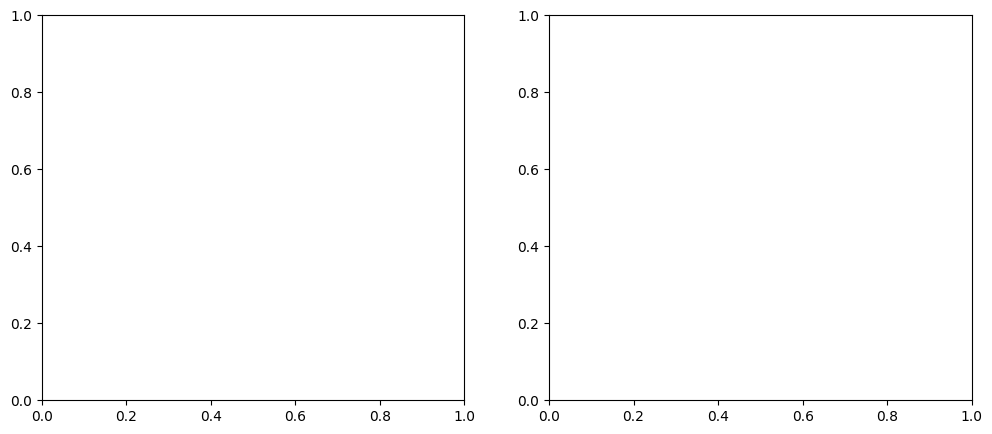

In [21]:
# Step 16: Visualizations

# Confusion Matrix Heatmap
fig, ax = plt.subplots(1, 2, figsize=(12, 5))

In [22]:
# Random Forest Confusion Matrix
rf_cm = confusion_matrix(y_test, rf_y_pred)
sns.heatmap(rf_cm, annot=True, fmt="d", cmap="Blues", ax=ax[0], cbar=False)
ax[0].set_title('Random Forest Confusion Matrix', fontsize=14, ha='center')
ax[0].set_xlabel('Predicted', fontsize=12)
ax[0].set_ylabel('Actual', fontsize=12)
ax[0].tick_params(axis='both', which='major', labelsize=10)


In [23]:
# Logistic Regression Confusion Matrix
logreg_cm = confusion_matrix(y_test, logreg_y_pred)
sns.heatmap(logreg_cm, annot=True, fmt="d", cmap="Blues", ax=ax[1], cbar=False)
ax[1].set_title('Logistic Regression Confusion Matrix', fontsize=14, ha='center')
ax[1].set_xlabel('Predicted', fontsize=12)
ax[1].set_ylabel('Actual', fontsize=12)
ax[1].tick_params(axis='both', which='major', labelsize=10)


In [24]:
plt.tight_layout()
plt.subplots_adjust(wspace=0.3)
plt.show()


<Figure size 640x480 with 0 Axes>

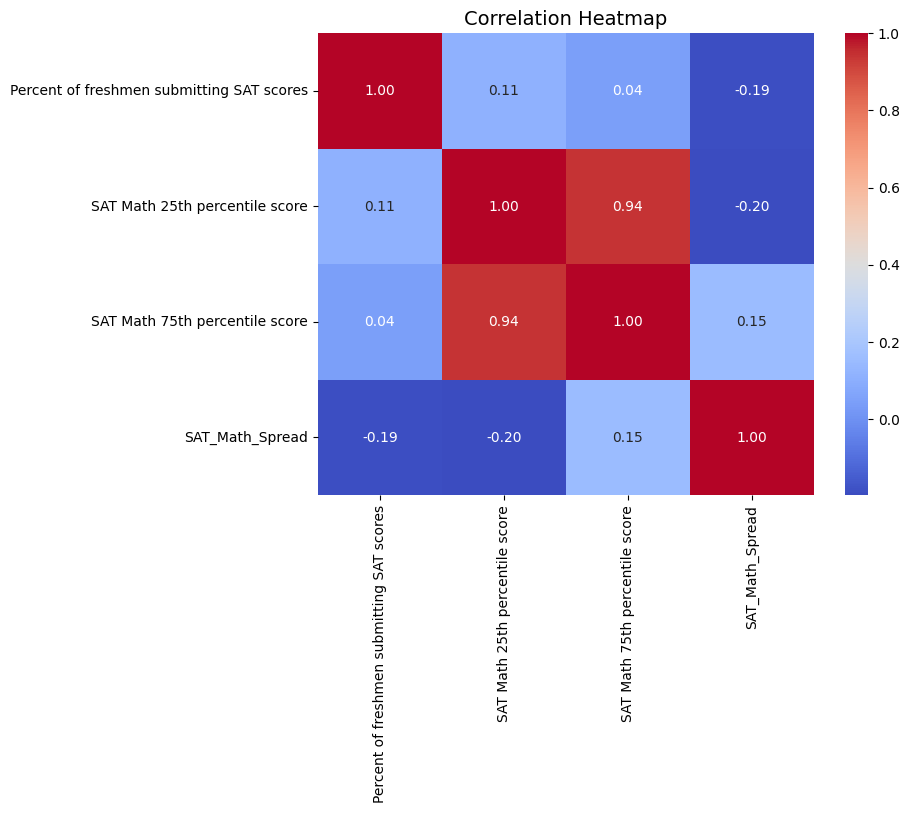

In [25]:
# Correlation Heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(data[features].corr(), annot=True, cmap='coolwarm', fmt='.2f', cbar=True)
plt.title('Correlation Heatmap', fontsize=14)
plt.show()

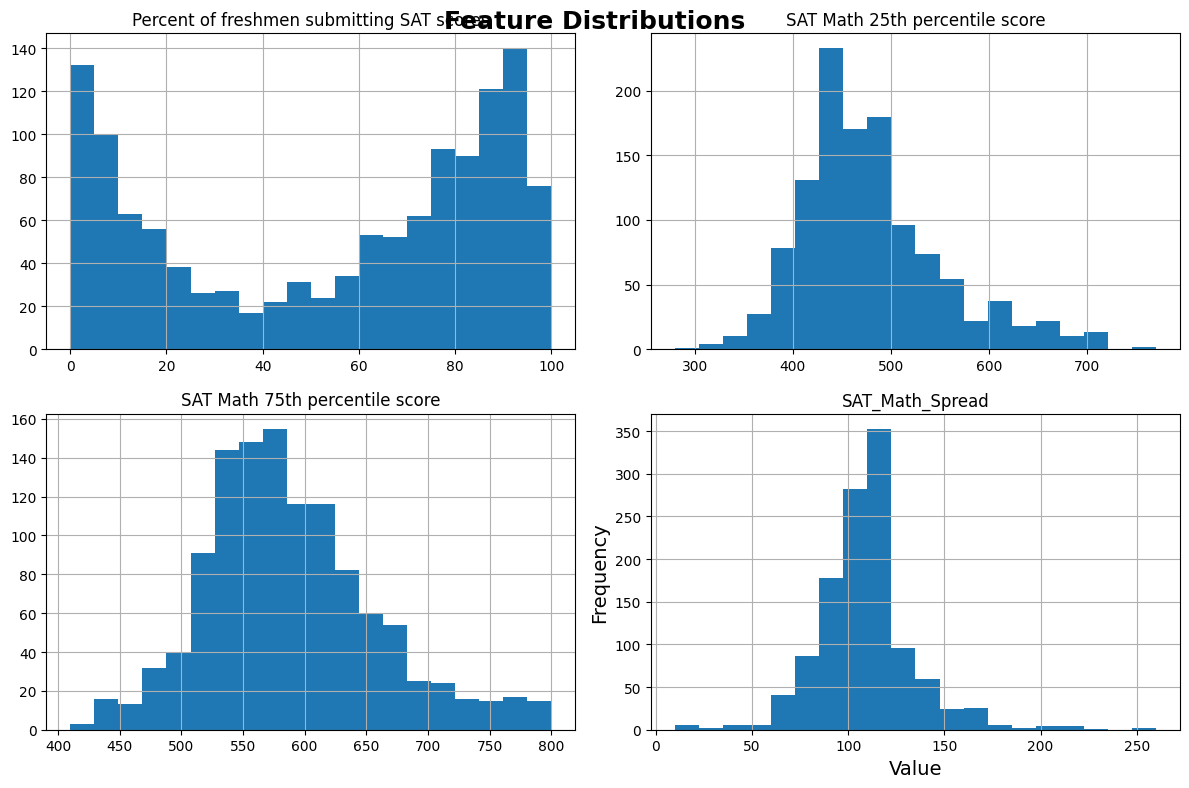

In [26]:
# Histograms of features with adjusted font sizes
data[features].hist(bins=20, figsize=(12, 8))
plt.suptitle('Feature Distributions', fontsize=18, fontweight='bold')  # Title with larger font
plt.xlabel('Value', fontsize=14)  # X-axis label with larger font
plt.ylabel('Frequency', fontsize=14)  # Y-axis label with larger font
plt.tight_layout()
plt.subplots_adjust(top=0.95)  # Adjust layout to prevent title cutoff
plt.show()

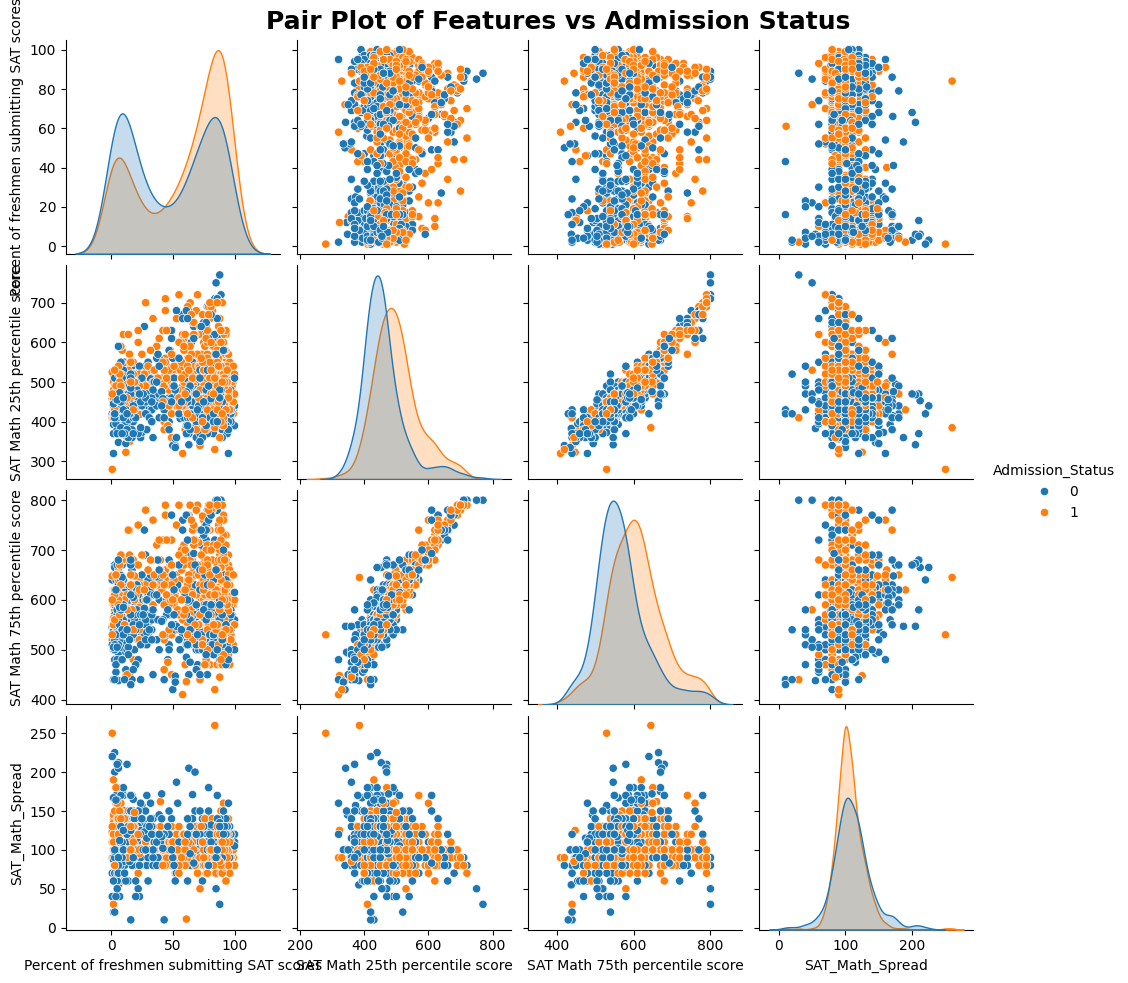

In [27]:
# Pair plot with adjusted font size and markers
sns.pairplot(data[features + ['Admission_Status']], hue='Admission_Status', plot_kws={'markers': 'o'})
plt.suptitle('Pair Plot of Features vs Admission Status', fontsize=18, fontweight='bold')  # Title with larger font
plt.subplots_adjust(top=0.95)  # Adjust the layout to fit the title
plt.show()

In [28]:
# Step 17: Predict for new data using the model with the highest accuracy
sample_input = pd.DataFrame([[85, 600, 650, 50]], columns=features)  # Include the new feature SAT_Math_Spread
sample_input = scaler.transform(sample_input)  # Scale the input to match training data


In [29]:
# Select the model with higher accuracy
best_model = rf_model if rf_accuracy > logreg_accuracy else logreg_model


In [30]:
# Prediction
admission_prediction = best_model.predict(sample_input)
print(f"Prediction using {'Random Forest' if best_model == rf_model else 'Logistic Regression'}: {'Admitted' if admission_prediction[0] == 1 else 'Not Admitted'}")

Prediction using Random Forest: Not Admitted


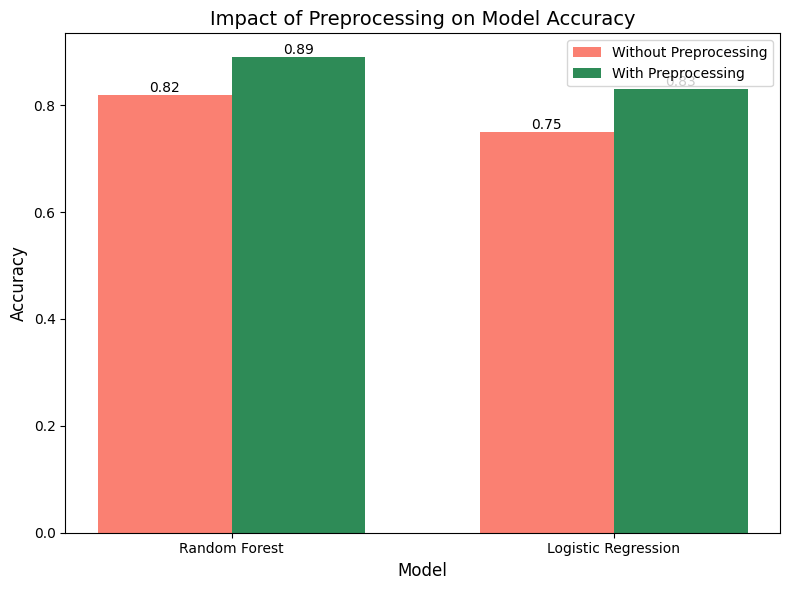

In [1]:
import matplotlib.pyplot as plt
import numpy as np

# Data
models = ['Random Forest', 'Logistic Regression']
without_preprocessing = [0.82, 0.75]
with_preprocessing = [0.89, 0.83]

x = np.arange(len(models))
width = 0.35

# Plot
fig, ax = plt.subplots(figsize=(8, 6))
bars1 = ax.bar(x - width / 2, without_preprocessing, width, label='Without Preprocessing', color='salmon')
bars2 = ax.bar(x + width / 2, with_preprocessing, width, label='With Preprocessing', color='seagreen')

# Labels and legend
ax.set_xlabel('Model', fontsize=12)
ax.set_ylabel('Accuracy', fontsize=12)
ax.set_title('Impact of Preprocessing on Model Accuracy', fontsize=14)
ax.set_xticks(x)
ax.set_xticklabels(models, fontsize=10)
ax.legend(fontsize=10)

# Display values on bars
for bars in [bars1, bars2]:
    ax.bar_label(bars, fmt='%.2f', fontsize=10)

plt.tight_layout()
plt.show()
